<a href="https://colab.research.google.com/github/dehghani-ds/fraud-detection-logistic/blob/main/bigDataProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/api/v1/datasets/download/mlg-ulb/creditcardfraud
ZIP file downloaded successfully!
Files in ZIP: ['creditcard.csv']
Extracting CSV file: creditcard.csv
training dataset size=[683520]
test dataset size =[7860690]
model training time =[0:00:18.366562]
model accurecy =[0.9991107650855078]:
Confusion Matrix: 
 [[261522     45]
 [   188    268]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    261567
           1       0.86      0.59      0.70       456

    accuracy                           1.00    262023
   macro avg       0.93      0.79      0.85    262023
weighted avg       1.00      1.00      1.00    262023

########################## Precision-Recall Curve ##########################


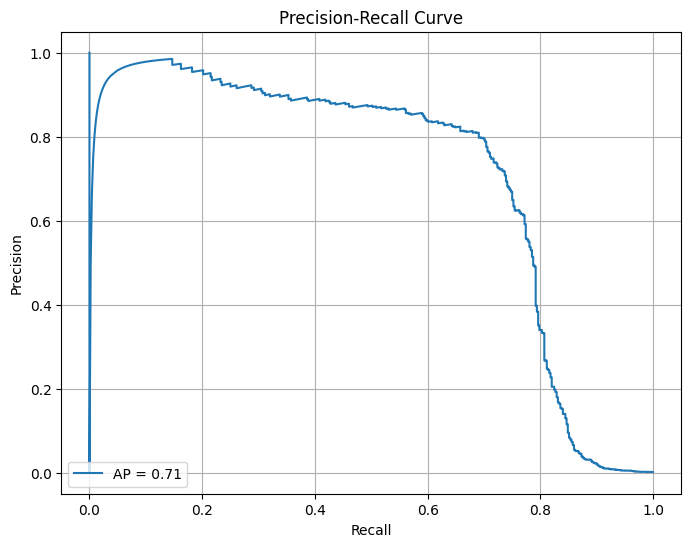

########################## ROC Curve ##########################


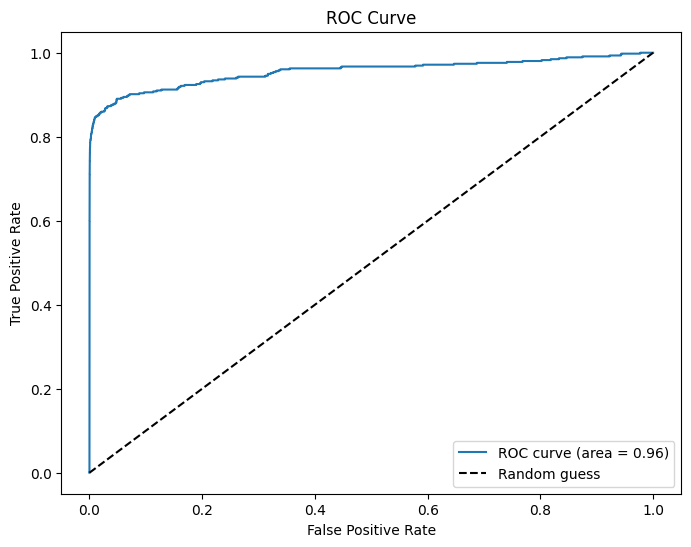

########################## Confusion Matrix ##########################


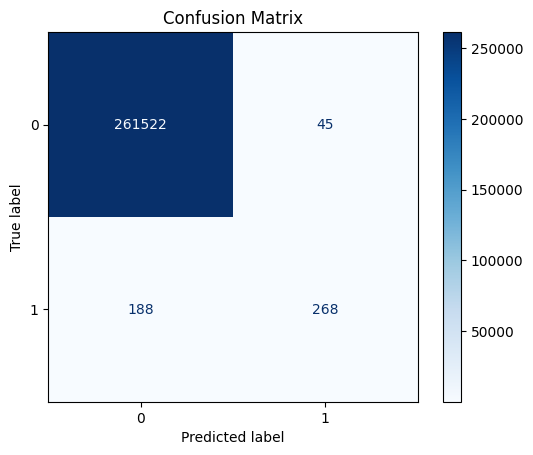

########################## Class Distribution Histogram ##########################


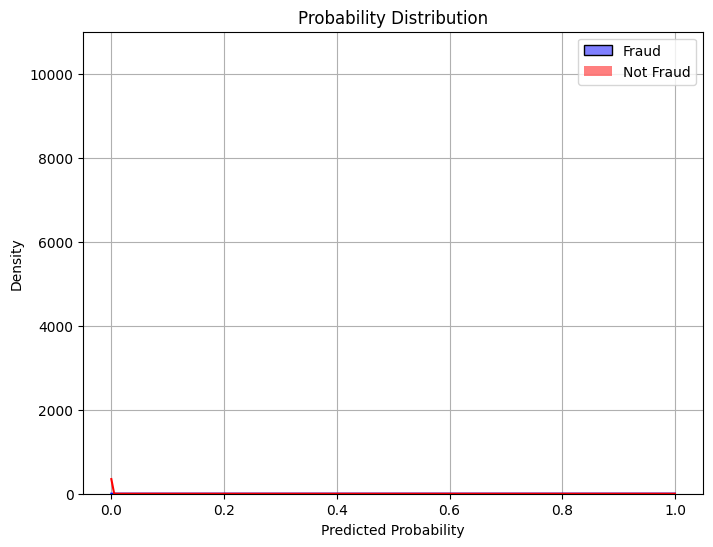

########################## Run Parallel ##########################


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:71: FutureWarning: Class parallel_backend is deprecated; deprecated in 1.5 to be removed in 1.7. Use joblib.{} instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/joblibspark/backend.py:110: UserWarning: Spark local mode doesn't support stage-level scheduling.
  warnings.warn("Spark local mode doesn't support stage-level scheduling.")


model training time =[0:00:22.412932]


In [1]:
import requests
import zipfile
import io
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import datetime

def readCsvFromLink(url):
    # Step 1: print url
    print(url)
    # Step 2: Download the ZIP file
    response = requests.get(url)
    if response.status_code == 200:
        print("ZIP file downloaded successfully!")
    else:
        raise Exception(f"Failed to download file. Status code: {response.status_code}")
    # Step 3: Read the ZIP file in memory and decompress
    zip_bytes = io.BytesIO(response.content)  # Convert to a file-like object
    with zipfile.ZipFile(zip_bytes, 'r') as zip_ref:
        # List all files in the ZIP archive
        print("Files in ZIP:", zip_ref.namelist())

        # Step 4: Extract the desired CSV file
        for file_name in zip_ref.namelist():
            if file_name.endswith('.csv'):
                print(f"Extracting CSV file: {file_name}")
                with zip_ref.open(file_name) as csv_file:
                    # Step 5: Read the CSV file into a pandas DataFrame
                    df = pd.read_csv(csv_file)

                    return df

data = readCsvFromLink("https://www.kaggle.com/api/v1/datasets/download/mlg-ulb/creditcardfraud")
'''
print("CSV file content:")
'''
#print(data.head())  # Display first few rows
#print(data.iloc[:, :30])
#print(data.iloc[:, 30:31])

# print(type(data))

#print("Missing values per column:")
#print(data.isnull().sum())

# Step 3: Identify rows with missing values
#rows_with_missing = data[data.isnull().any(axis=1)]
#print("\nRows with missing values:")
#print(rows_with_missing)

#Step 3.1: split data to train and test
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :30], data.iloc[:, 30:31].values.ravel(), test_size=0.92, random_state=1)
print(f"training dataset size=[{X_train.size}]")
print(f"test dataset size =[{X_test.size}]")

# Step4: modeling
logistic_age_model = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)
start = datetime.datetime.now()
fitted_model = logistic_age_model.fit(X_train, y_train)
end = datetime.datetime.now()
print(f"model training time =[{end - start}]")

# Step5: testing
y_pred = logistic_age_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# results
print(f"model accurecy =[{accuracy}]:")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

# visualize result
y_pred_proba = logistic_age_model.predict_proba(X_test)[:, 1]

print("########################## Precision-Recall Curve ##########################")
# Assume y_test is the true labels, and y_pred_proba are predicted probabilities
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()
print("########################## ROC Curve ##########################")

fpr, tpr, thresholdsROC = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

print("########################## Confusion Matrix ##########################")
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)  # Choose a color map
plt.title("Confusion Matrix")
plt.show()

print("########################## Class Distribution Histogram ##########################")
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba[y_test == 1], color='blue', label='Fraud', kde=True, stat="density")
sns.histplot(y_pred_proba[y_test == 0], color='red', label='Not Fraud', kde=True, stat="density")
plt.title('Probability Distribution')
plt.xlabel('Predicted Probability')
plt.legend()
plt.grid()
plt.show()


print("########################## Run Parallel ##########################")
!pip install joblibspark
from joblibspark import register_spark
from sklearn.utils import parallel_backend

register_spark() # register spark backend
logistic_age_model_parallel = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)
start_parallel = datetime.datetime.now()
with parallel_backend('spark', n_jobs=2):
  logistic_age_model_parallel.fit(X_train, y_train)
end_parallel = datetime.datetime.now()
print(f"model training time =[{end_parallel - start_parallel}]")